In [2]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# rename columns for clarity
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# encoding labels
le_encoder = LabelEncoder()
df['label'] = le_encoder.fit_transform(df['label'])

In [9]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(403)

In [12]:
#remove duplicates
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

np.int64(0)

In [13]:
df.shape

(5169, 2)

### EDA and Feature Engineering

In [14]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

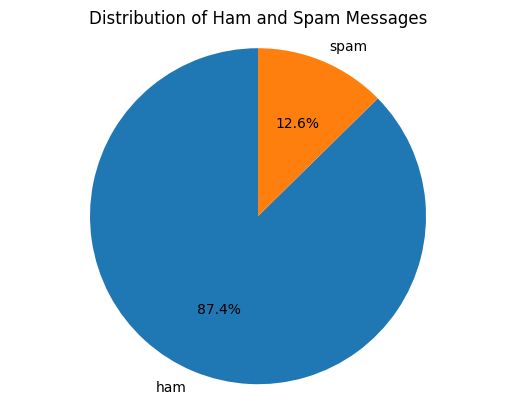

In [16]:
# check for data imbalance
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Ham and Spam Messages')
plt.axis('equal')  
plt.show()

In [17]:
# add column to count characters in each message
df['char_count'] = df['message'].apply(len)
df.head()

,label,message,char_count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:

from nltk.tokenize import TreebankWordTokenizer
# add column to count words in each message
tokenizer = TreebankWordTokenizer()
df['word_count'] = df['message'].apply(lambda x: len(tokenizer.tokenize(x)))
df.head()



,label,message,char_count,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
# add column to count sentences in each message
from nltk.tokenize import PunktSentenceTokenizer
sentence_tokenizer = PunktSentenceTokenizer()
df['sentence_count'] = df['message'].apply(lambda x: len(sentence_tokenizer.tokenize(x)))
df.head()

,label,message,char_count,word_count,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,23,1
1,0,Ok lar... Joking wif u oni...,29,8,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
df[['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,17.695299,1.919714
std,58.236293,12.672457,1.428215
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,14.000000,1.000000
75%,117.000000,25.000000,2.000000
max,910.000000,214.000000,38.000000


In [21]:
#ham analysis
df[df['label'] == 0][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.452613,1.767715
std,56.358207,12.858450,1.353829
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,21.000000,2.000000
max,910.000000,214.000000,38.000000


In [22]:
# spam analysis
df[df['label'] == 1][['char_count', 'word_count', 'sentence_count']].describe()

,char_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,26.289433,2.970904
std,30.137753,6.579189,1.486363
min,13.000000,2.000000,1.000000
25%,132.000000,24.000000,2.000000
50%,149.000000,28.000000,3.000000
75%,157.000000,30.000000,4.000000
max,224.000000,41.000000,9.000000


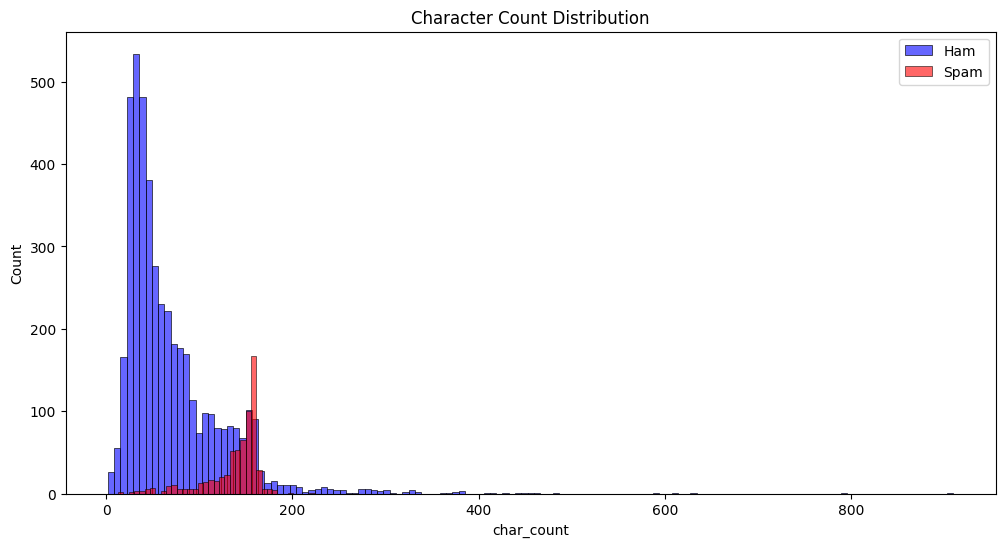

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['char_count'], color='blue', label='Ham', alpha=0.6)
sns.histplot(df[df['label'] == 1]['char_count'], color='red', label='Spam', alpha=0.6)
plt.title('Character Count Distribution')
plt.legend()
plt.show()

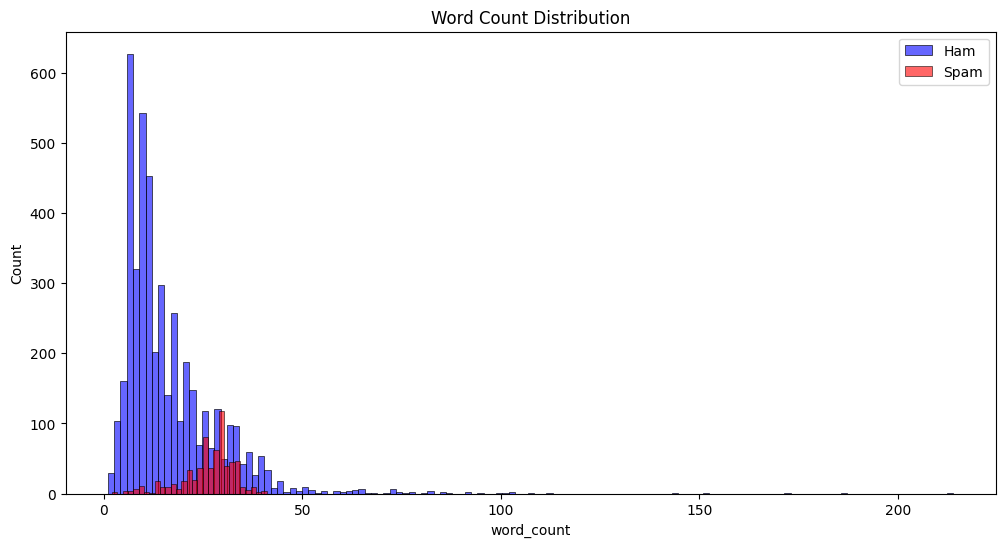

In [26]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['word_count'], color='blue', label='Ham', alpha=0.6)
sns.histplot(df[df['label'] == 1]['word_count'], color='red', label='Spam', alpha=0.6)
plt.title('Word Count Distribution')
plt.legend()
plt.show()

<Axes: >

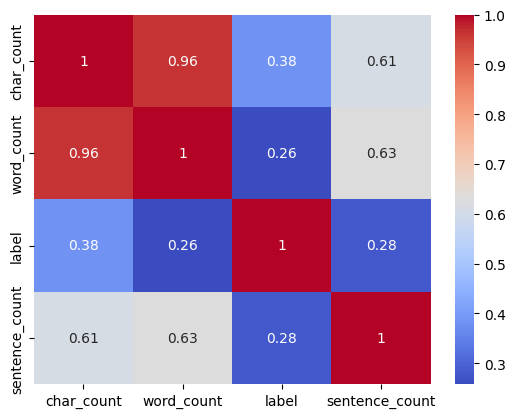

In [28]:
sns.heatmap(df[['char_count', 'word_count', 'label','sentence_count']].corr(), annot=True, cmap='coolwarm')


### Data Preprocessing

In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def transform_text(text):
    # Convert to lowercase
    text = text.lower()
    # tokenize the text
    text = tokenizer.tokenize(text)
    
    x=[]
    for i in text:
        # remove special characters
        if i.isalnum():
            x.append(i)
            
    text = x[:]
    x.clear()
    
    for i in text:
        # remove stopwords and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
     
    text = x[:]
    x.clear()
    
    for i in text:
        # stemmize the words
        x.append(ps.stem(i))   
            
    return ' '.join(x)

In [37]:
transform_text("Hi there! I'm working on a text preprocessing project.")


'hi work text preprocess project'

In [38]:
# add a new column with transformed text
df['transformed_text'] = df['message'].apply(transform_text)
df.head()

,label,message,char_count,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,1,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,1,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,36,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


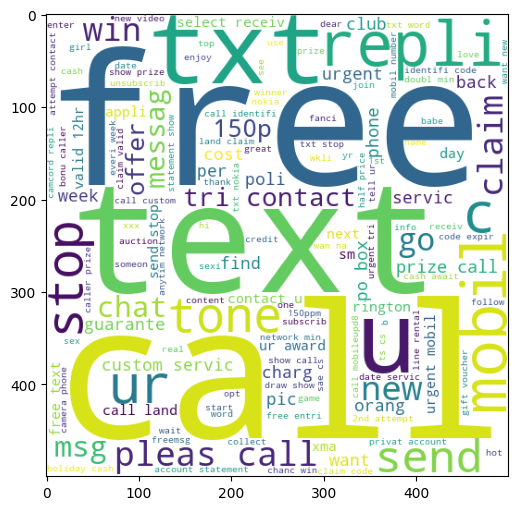

In [39]:
# check the word cloud for spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

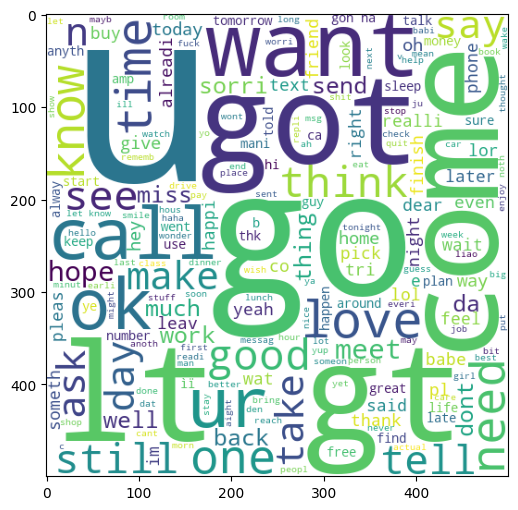

In [40]:
# check the word cloud for ham messages
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [41]:
# top 30 words in spam messages
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

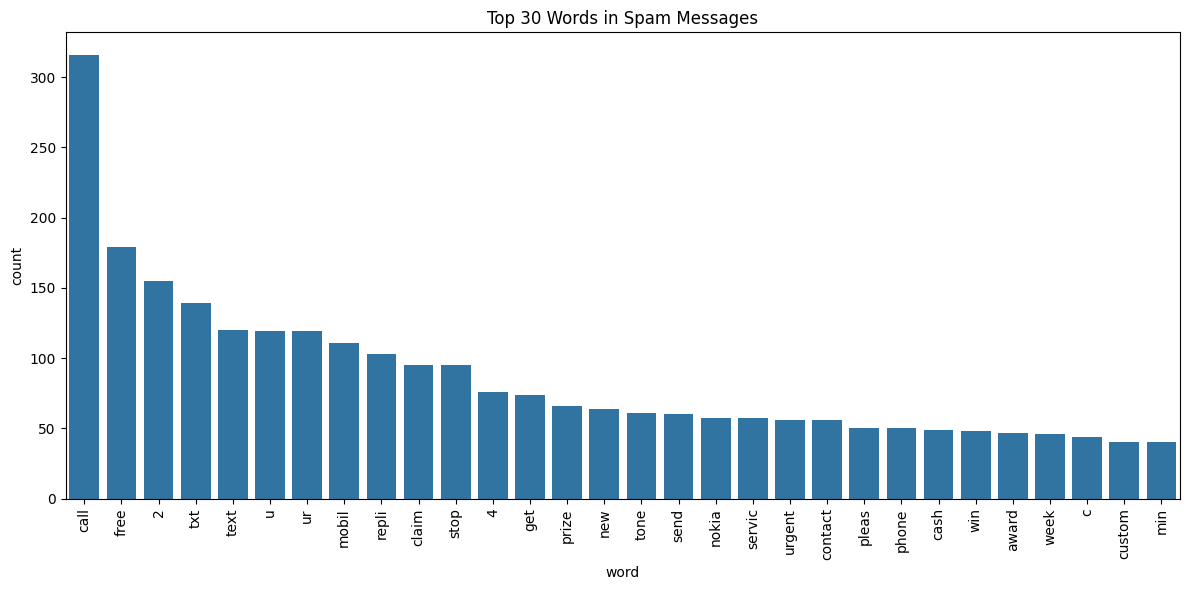

In [46]:
from collections import Counter
top_words = Counter(spam_corpus).most_common(30)

# Convert to DataFrame
df_top_words = pd.DataFrame(top_words, columns=['word', 'count'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_top_words)
plt.xticks(rotation=90)
plt.title('Top 30 Words in Spam Messages')
plt.tight_layout()
plt.show()

In [47]:
# top 30 words in ham messages
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

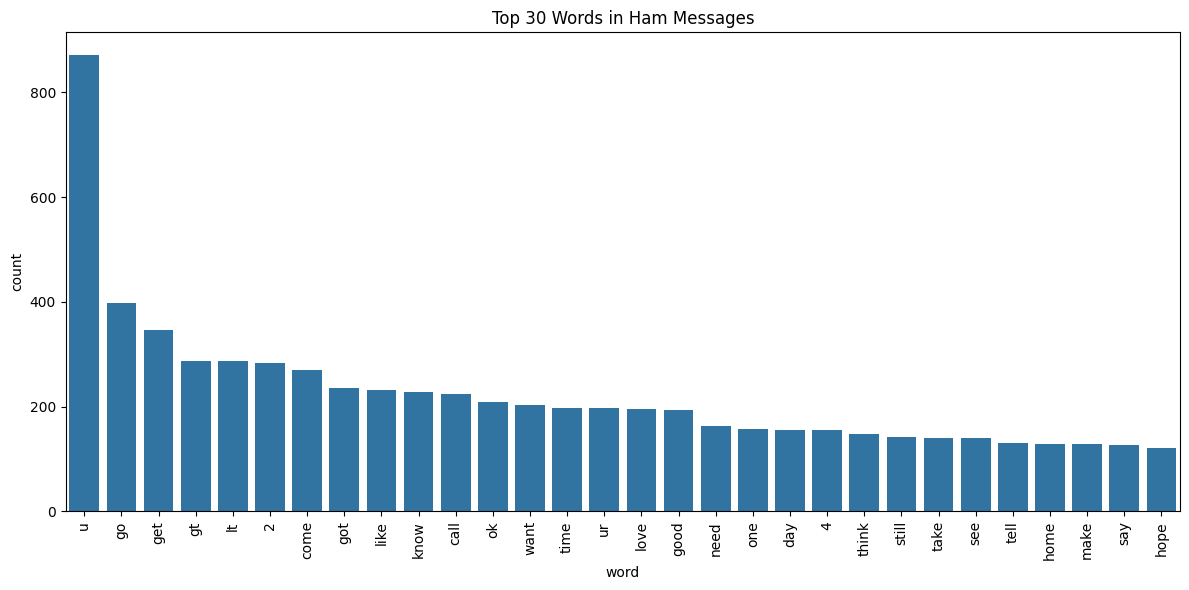

In [48]:
top_words_ham = Counter(ham_corpus).most_common(30)
# Convert to DataFrame
df_top_words_ham = pd.DataFrame(top_words_ham, columns=['word', 'count'])
# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=df_top_words_ham)
plt.xticks(rotation=90)
plt.title('Top 30 Words in Ham Messages')
plt.tight_layout()
plt.show()


### Model Building

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [68]:
tfidf = TfidfVectorizer(max_features=3000)

In [69]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
GNB = GaussianNB()
MNB = MultinomialNB()
BNB = BernoulliNB()

In [54]:
# Try Gaussian Naive Bayes
GNB.fit(X_train, y_train)
y_pred_gnb = GNB.predict(X_test)
print("Gaussian Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("Precision Score:", precision_score(y_test, y_pred_gnb))

Gaussian Naive Bayes Accuracy: 0.8471953578336557
Confusion Matrix:
 [[756 133]
 [ 25 120]]
Precision Score: 0.4743083003952569


In [70]:
# try Multinomial Naive Bayes
MNB.fit(X_train, y_train)
y_pred_mnb = MNB.predict(X_test)
print("Multinomial Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("Precision Score:", precision_score(y_test, y_pred_mnb))

Multinomial Naive Bayes Accuracy: 0.9729206963249516
Confusion Matrix:
 [[888   1]
 [ 27 118]]
Precision Score: 0.9915966386554622


In [56]:
# Try Bernoulli Naive Bayes
BNB.fit(X_train, y_train)
y_pred_bnb = BNB.predict(X_test)
print("Bernoulli Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("Precision Score:", precision_score(y_test, y_pred_bnb))

Bernoulli Naive Bayes Accuracy: 0.9729206963249516
Confusion Matrix:
 [[885   4]
 [ 24 121]]
Precision Score: 0.968


In [57]:
# Try other classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [58]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [59]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [60]:
def train_classifier(clf,X_train, y_train,X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [61]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9738878143133463
Precision -  0.9338235294117647
For  KN
Accuracy -  0.902321083172147
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9497098646034816
Precision -  0.8907563025210085
For  RF
Accuracy -  0.9661508704061895
Precision -  0.9824561403508771
For  AdaBoost
Accuracy -  0.9168278529980658
Precision -  0.8172043010752689
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8686131386861314
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.96875
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9615384615384616


In [63]:
performance_df = pd.DataFrame({'Classifier': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values(by='Precision', ascending=False)

In [64]:
performance_df

,Classifier,Accuracy,Precision
1,KN,0.902321,1.000000
2,NB,0.972921,0.991597
5,RF,0.966151,0.982456
8,ETC,0.975822,0.968750
9,GBDT,0.952611,0.961538
0,SVC,0.973888,0.933824
4,LR,0.949710,0.890756
7,BgC,0.957447,0.868613
3,DT,0.929400,0.833333
6,AdaBoost,0.916828,0.817204


In [65]:
from sklearn.ensemble import VotingClassifier

KN = KNeighborsClassifier()
MNB = MultinomialNB()
RF = RandomForestClassifier(n_estimators=50, random_state=2)

In [66]:
voting = VotingClassifier(estimators=[('knn', KN), ('mnb', MNB), ('rf', RF)], voting='soft')
voting.fit(X_train, y_train)

,estimators,"[('knn', ...), ('mnb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2


In [67]:
y_pred_voting = voting.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))
print("Precision Score:", precision_score(y_test, y_pred_voting))

Voting Classifier Accuracy: 0.9545454545454546
Confusion Matrix:
 [[889   0]
 [ 47  98]]
Precision Score: 1.0


### Best Performer Multinomial Naive Baye Classifier

In [ ]:
import pickle

with open('spam-classifier.pkl', 'wb') as f:
    pickle.dump(MNB, f)
    
with open('tfidf-vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)